In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import scipy.optimize as opt
from scipy.optimize import curve_fit
import spinmob as s
# import os 
# os.chdir('C:\\Users\\joeyb\\Documents\\Physics 359\\Hall')

In [2]:
mv = (np.loadtxt('all_the_mv.csv', delimiter=',', skiprows = 1))

In [5]:
result = []
for sublist in mv:
    for item in sublist:
        result.append(item)
#print("\nCollapse nested lists:")
final_result = np.transpose(result)
# print(final_result)

# print(len(mv))

### Temp vs Voltage

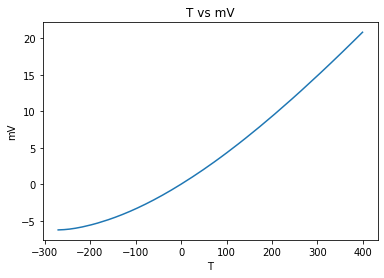

In [6]:
plt.plot(np.linspace(-270, 399, 670), final_result)
plt.title("T vs mV")
plt.xlabel('T')
plt.ylabel('mV')
plt.show()

In [37]:
def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

def quartic(x, a, b, c, e, f):
    return a*x**4 + b*x**3 + c*x**2 + e*x + f

#the problem here is that it takes temp as input, not voltage
TimeArray = np.linspace(-270, 399, 670)

#fit with curveFit
fit,fit_err = curve_fit(quadratic, TimeArray, final_result)

print(fit[0], fit[1], fit[2])

4.071526325287976e-05 0.03671662547130989 0.11121867604243395


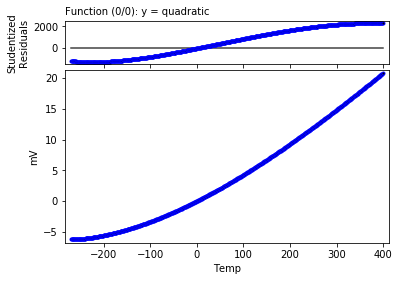

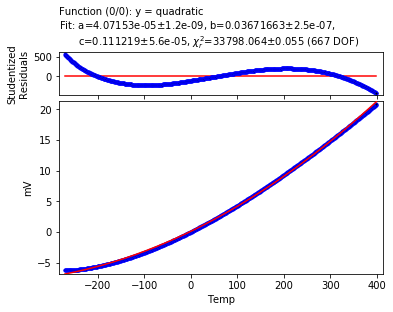


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          ['Temp']
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          ['mV']
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 1984934.314 +/- 0.055, 667.0 DOF)
  a          = 4.1e-05
  b          = 0.03
  c          = 0.01

FIT RESULTS (reduced chi^2 = 33798.064 +/- 0.055, 667 DOF)
  a          = 4.07153e

In [34]:
#with spinmod
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Temp" , ylabel = "mV")
# help(s.data.fitter)

guess= 'a=4.1e-5, b=0.03, c=0.01'
my_fitter.set_functions(f=quadratic, p=guess)

my_fitter.set_data(xdata=TimeArray, ydata=final_result, eydata=0.001)
my_fitter.fit()

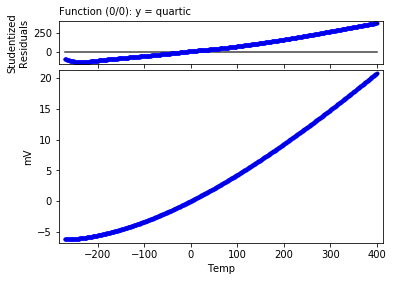

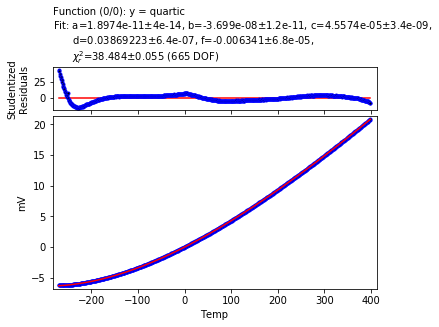


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          ['Temp']
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          ['mV']
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 29024.596 +/- 0.055, 665.0 DOF)
  a          = 1.8e-11
  b          = -3.7e-08
  c          = 4.5e-05
  d          = 0.038
  f          = -0.0063

FIT RESULTS (reduced chi^2 = 38.4

In [38]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Temp" , ylabel = "mV")
# help(s.data.fitter)

guess= 'a=1.8e-11, b=-3.7e-8, c=4.5e-5, d=3.8e-2, f=-6.3e-3'
# 1.89743962e-11 -3.69901267e-08  4.55740398e-05  3.86922293e-02
#  -6.34126241e-03
my_fitter.set_functions(f=quartic, p=guess)

my_fitter.set_data(xdata=TimeArray, ydata=final_result, eydata=0.001)
my_fitter.fit()

In [32]:
#with curve fit
# fit,fit_err = curve_fit(quadratic, TimeArray, final_result)


fitP, fit_errP = np.polyfit(TimeArray, final_result, 4, cov=True)
print(fitP)

[ 1.89743962e-11 -3.69901267e-08  4.55740398e-05  3.86922293e-02
 -6.34126241e-03]


### Imput Temp value here to get Voltage

In [ ]:
InputTemp = -3.8e-3

print(quadratic(InputVoltage8, fit[0], fit[1], fit [2]))

Reverse now

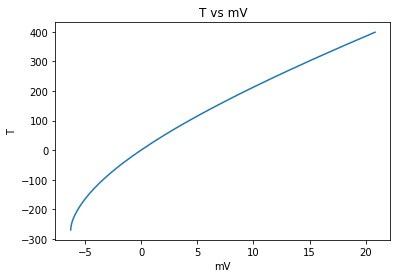

In [9]:
plt.plot(final_result, TimeArray)
plt.title("T vs mV")
plt.xlabel('mV')
plt.ylabel('T')
plt.show()

In [15]:
def QuadFormula(V, para):
    a = para[0]
    b = para[1]
    c = para[2]

    d = b**2-4*a*(c-V) # discriminant

    temp = [0, 0]
    #no solution, something broke
    if d < 0:
        temp[0] = 10e3
    
    elif d == 0:
        temp[0] = -b / (2*a)
        
    else: # if d > 0
        temp[0] = (-b + np.sqrt(d)) / (2*a)
        temp[1] = (-b - np.sqrt(d)) / (2*a)
        
    return temp

print(QuadFormula(9.822, fit)) #200

[213.7936112319484, -1115.5838131831283]


### Trying with just taking linear approx on small scales

In [87]:
def linear(V, m, b):
    return m*V + b

def getTempFromVolt(V):
    fitted = False
    index = 0

    while fitted == False:
    #     print(min(mVArraysOf10[index]), (max(mVArraysOf10[index])) )
        if (min(mVArraysOf10[index]) <= V <= (max(mVArraysOf10[index])) ):
            TempVal = linear(V, fits[index][0][0], fits[index][0][1])
            fitted = True
        index+=1
        if index == len(fits):
            print("Error, Voltage not found.")
            TempVal = -1000
            break
    
    return TempVal
    

In [88]:
len(final_result)
mVArraysOf10 = np.split(final_result, len(final_result)/10)
TArraysOf10 = np.split(TimeArray, len(final_result)/10)

fits = []

for i in range(0, int(len(final_result)/10)):
#     print(TimeArray[i])
    fits.append(curve_fit(linear, mVArraysOf10[i], TArraysOf10[i]))

[-6.258 -6.256 -6.255 -6.253 -6.251 -6.248 -6.245 -6.242 -6.239 -6.236]


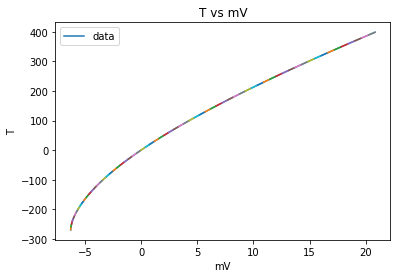

In [89]:
#plotting fits to make sure they match the data

plt.plot(final_result, TimeArray, label="data")
plt.title("T vs mV")
plt.xlabel('mV')
plt.ylabel('T')
plt.legend()

for i in range(0, len(fits)):
    plt.plot(mVArraysOf10[i], linear(mVArraysOf10[i], fits[i][0][0], fits[i][0][1]))

plt.show()

In [90]:
V = 0
Temp = getTempFromVolt(V)
            
print(Temp)

0.0037477819111435854
